In [32]:
%matplotlib inline

from os import listdir
from os.path import isfile, join

import sys
import subprocess
import glob
import json
import pandas as pd
import numpy as np

from collections import defaultdict
from collections import Counter

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib import rc

import pprint
pp = pprint.PrettyPrinter(indent=4)


sys.path.insert(0, '/home/cnaik/s/3/ilp')
from  utils import ilp_config

In [33]:
rc("grid", alpha=0.9)
rc("grid", linewidth=0.2)
rc("grid", linestyle=":")

In [34]:
mpl.use('pgf')

def figsize(scale):
    fig_width_pt = 469.755                          # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.27                       # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_latex = {                      # setup matplotlib to use latex for output
    "pgf.texsystem": "pdflatex",        # change this if using xetex or lautex
    "text.usetex": True,                # use LaTeX to write all text
    "font.family": "serif",
    "font.serif": [],                   # blank entries should cause plots to inherit fonts from the document
    "font.sans-serif": [],
    "font.monospace": [],
    "axes.labelsize": 10,               # LaTeX default is 10pt font.
    "text.fontsize": 10,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "figure.figsize": figsize(1),     # default fig size of 1 textwidth
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        ]
    }
mpl.rcParams.update(pgf_with_latex)

sns.set_context("paper", font_scale=1.0, rc={'lines.linewidth': 0.75,
                                             'axes.linewidth': 0.75,
                                             'text.usetex': True
                                             })
sns.set_style("whitegrid", {'font.family': 'serif',
                            'font.serif': ['Palatino']})

# sns.set(style="white")

---

In [35]:
all_roles = ['undergoer', 'enabler', 'trigger', 'result']

In [36]:
def get_prediction_data(d_predict):
    srl_data = defaultdict()
    for process_dict in d_predict:
        process = process_dict['process']
        # list of sentences
        for sentence_dict in process_dict['sentences']:
            sent_id = sentence_dict['sentenceId']
            # list of arguments
            for arg_dict in sentence_dict['predictionArgumentSpan']:
                arg_id = arg_dict['argId']
                start_id = int(arg_dict['startIdx'])
                end_id = int(arg_dict['endIdx'])
                role_type = arg_dict['annotatedRole']
                role_label = arg_dict['annotatedLabel']
                srl_probs = arg_dict['probRoles']
                role_probs = {}
                for role_prob in srl_probs:
                    role_probs.update(role_prob)
                if (sent_id, start_id, end_id) in srl_data:
                    print "Key Already Present:", k
                    sys.exit()
                srl_data[(sent_id, start_id, end_id)] = role_probs
    return srl_data

In [37]:
all_data = {}

for f, fold_dir in enumerate(listdir(ilp_config.cross_val_dir)):
    fold_path = join(ilp_config.cross_val_dir, fold_dir)
    d_predict_file = join(fold_path, 'test', 'test.srlpredict.json')
    d_predict = json.load(open(d_predict_file, "r"))
    srl_data = get_prediction_data(d_predict)
    all_data.update(srl_data)

---

In [38]:
x = []
for k, v in all_data.iteritems():
    for r, d in v.iteritems():
        x.append(d)

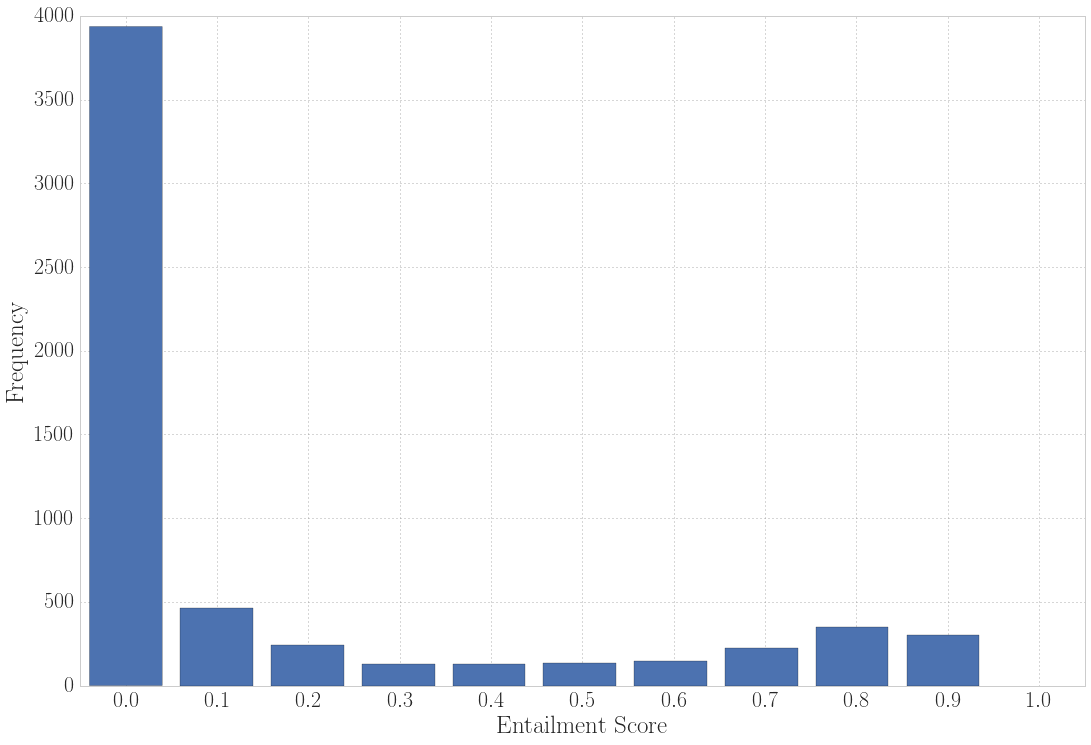

In [24]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 22,
        "ytick.labelsize": 22,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(x, 10, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Entailment Score')
plt.ylabel('Frequency')

# plt.tight_layout()
plt.savefig("entailment_distribution" + ".pdf", format='pdf')
plt.show()

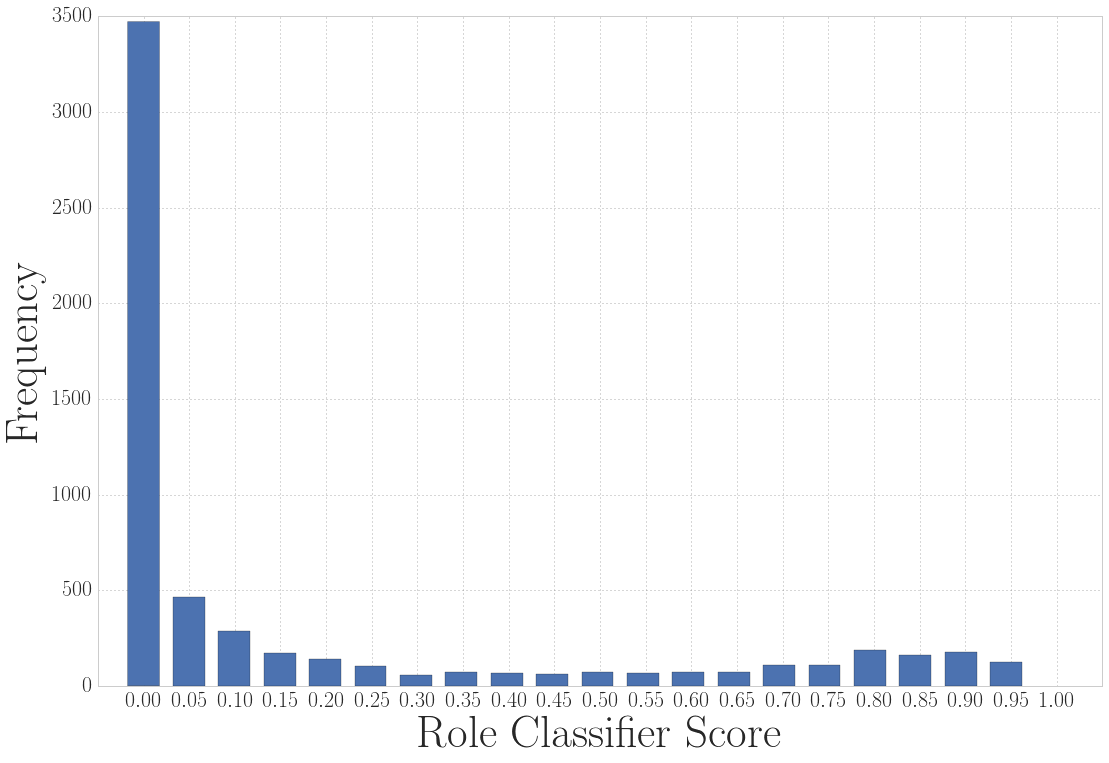

In [22]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 22,
        "ytick.labelsize": 22,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.05)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(x, 20, histtype='bar', rwidth=0.7, align='left')
plt.xlabel('Role Classifier Score', fontsize=45)
plt.ylabel('Frequency', fontsize=45)

# plt.tight_layout()
# plt.savefig("entailment_distribution" + ".pdf", format='pdf')
plt.show()

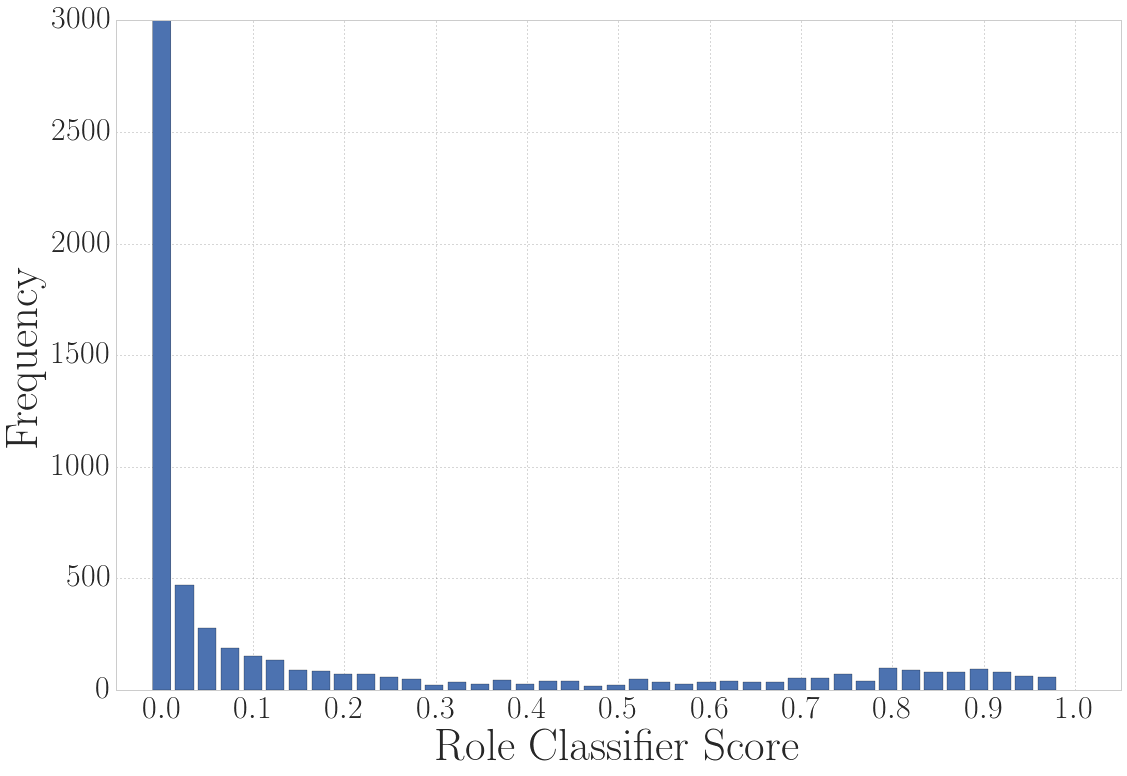

In [29]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 32,
        "ytick.labelsize": 32,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(x, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Role Classifier Score', fontsize=45)
plt.ylabel('Frequency', fontsize=45)

# plt.tight_layout()
plt.savefig("role_classifier_distribution" + ".pdf", format='pdf')
plt.show()

In [39]:
un = []
en = []
tr = []
re = []
no = []
for k, v in all_data.iteritems():
    for r, d in v.iteritems():
        if r == 'undergoer':
            un.append(d)
        if r == 'enabler':
            en.append(d)
        if r == 'trigger':
            tr.append(d)
        if r == 'result':
            re.append(d)
        if r == 'NONE':
            no.append(d)

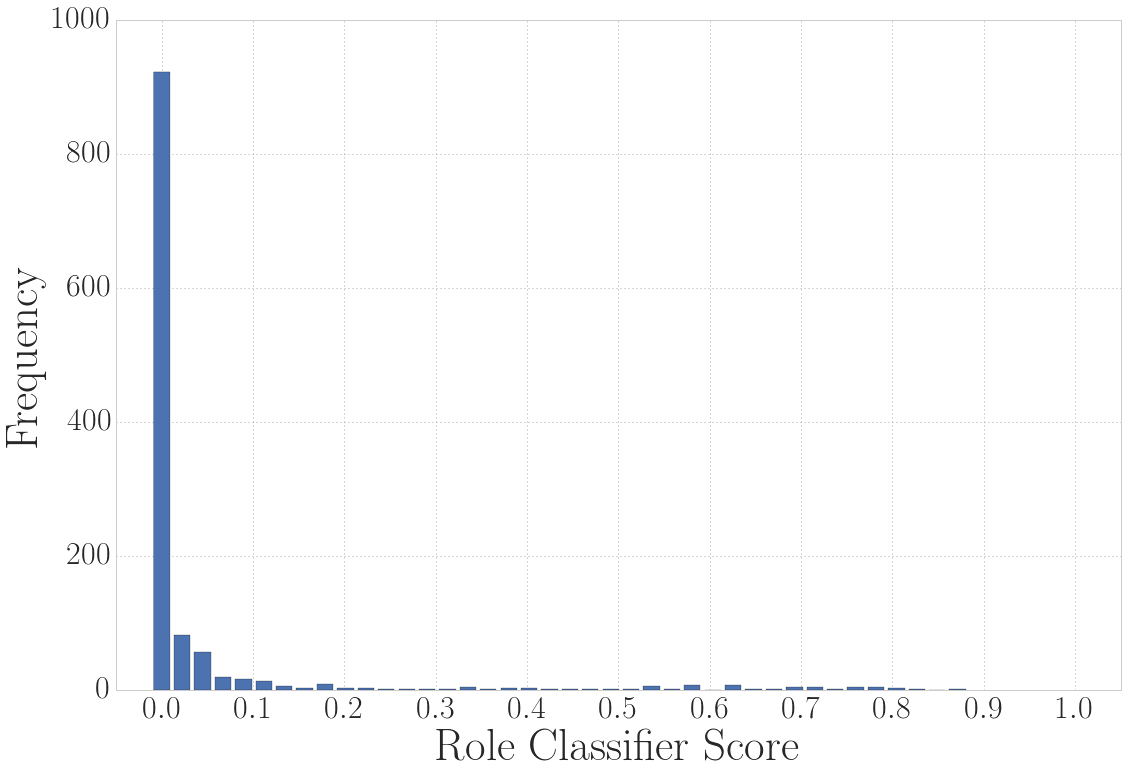

In [41]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 32,
        "ytick.labelsize": 32,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(un, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Role Classifier Score', fontsize=45)
plt.ylabel('Frequency', fontsize=45)

# plt.tight_layout()
plt.savefig("undergoer_distribution" + ".pdf", format='pdf')
plt.show()

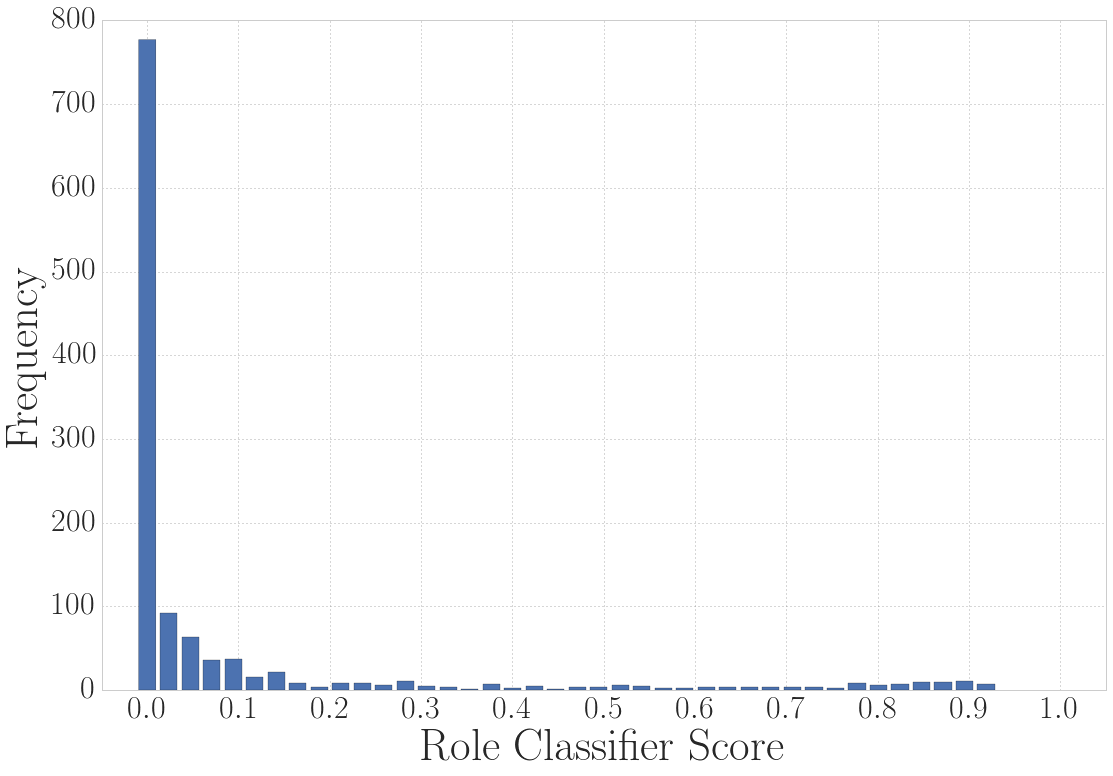

In [42]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 32,
        "ytick.labelsize": 32,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(en, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Role Classifier Score', fontsize=45)
plt.ylabel('Frequency', fontsize=45)

# plt.tight_layout()
plt.savefig("enabler_distribution" + ".pdf", format='pdf')
plt.show()

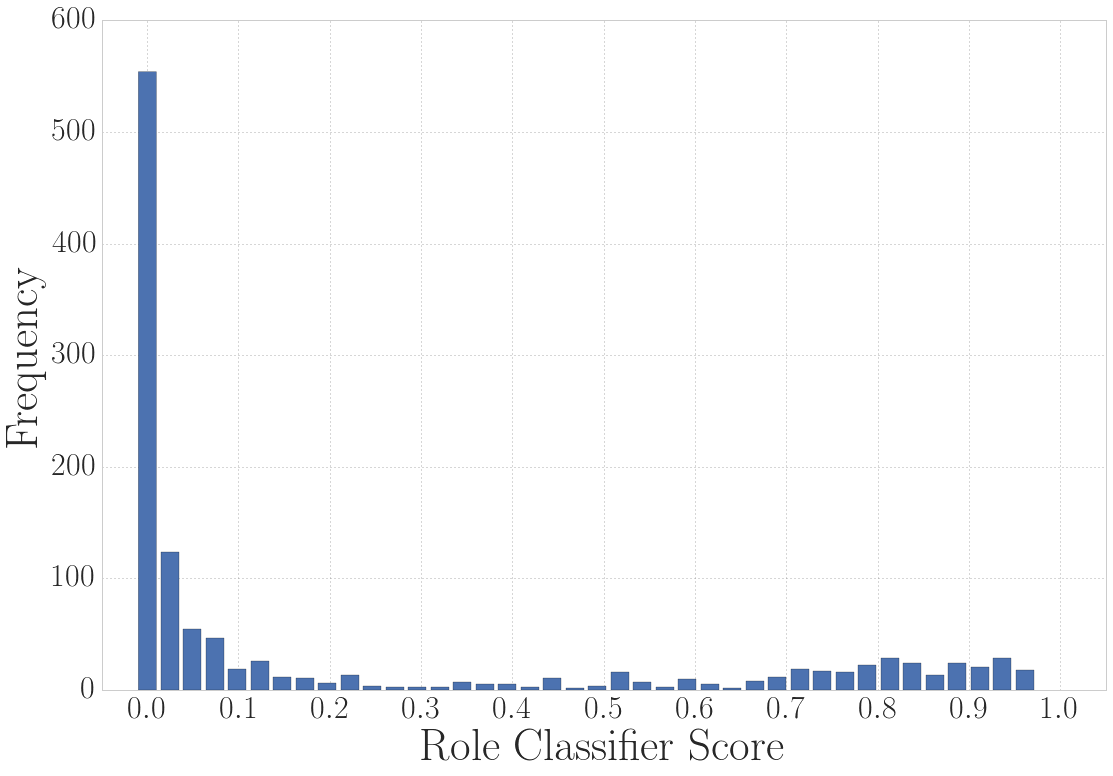

In [43]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 32,
        "ytick.labelsize": 32,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(tr, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Role Classifier Score', fontsize=45)
plt.ylabel('Frequency', fontsize=45)

# plt.tight_layout()
plt.savefig("trigger_distribution" + ".pdf", format='pdf')
plt.show()

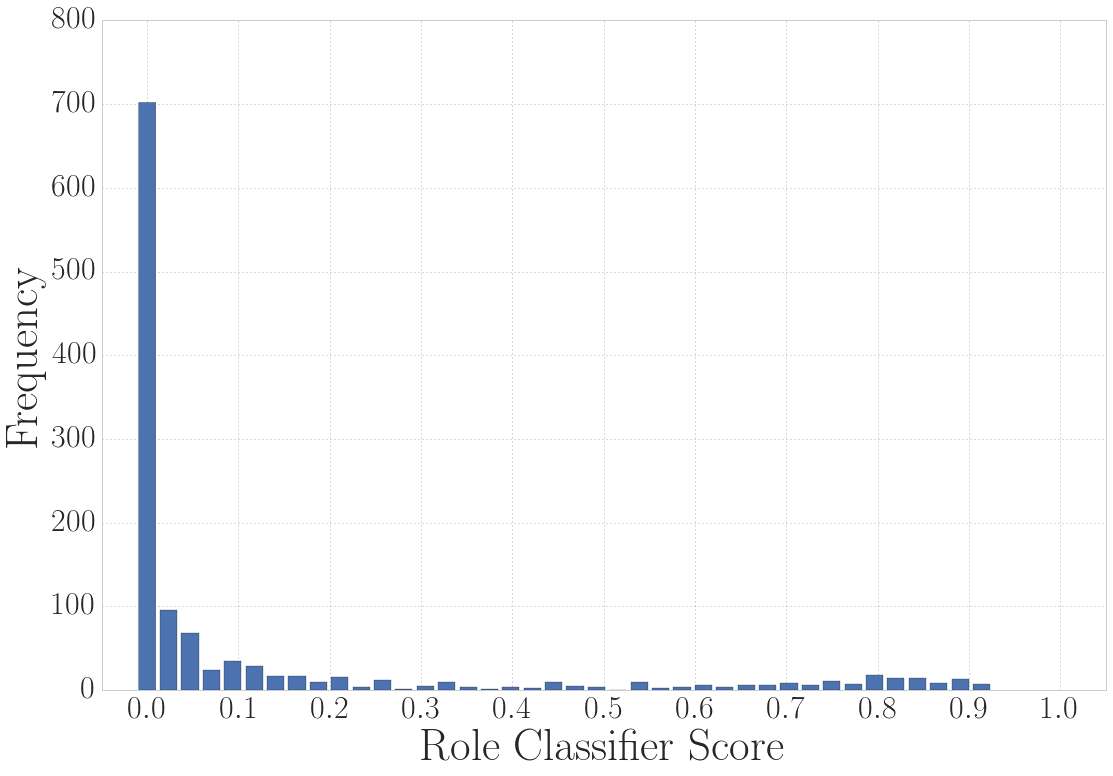

In [44]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 32,
        "ytick.labelsize": 32,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(re, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Role Classifier Score', fontsize=45)
plt.ylabel('Frequency', fontsize=45)

# plt.tight_layout()
plt.savefig("result_distribution" + ".pdf", format='pdf')
plt.show()

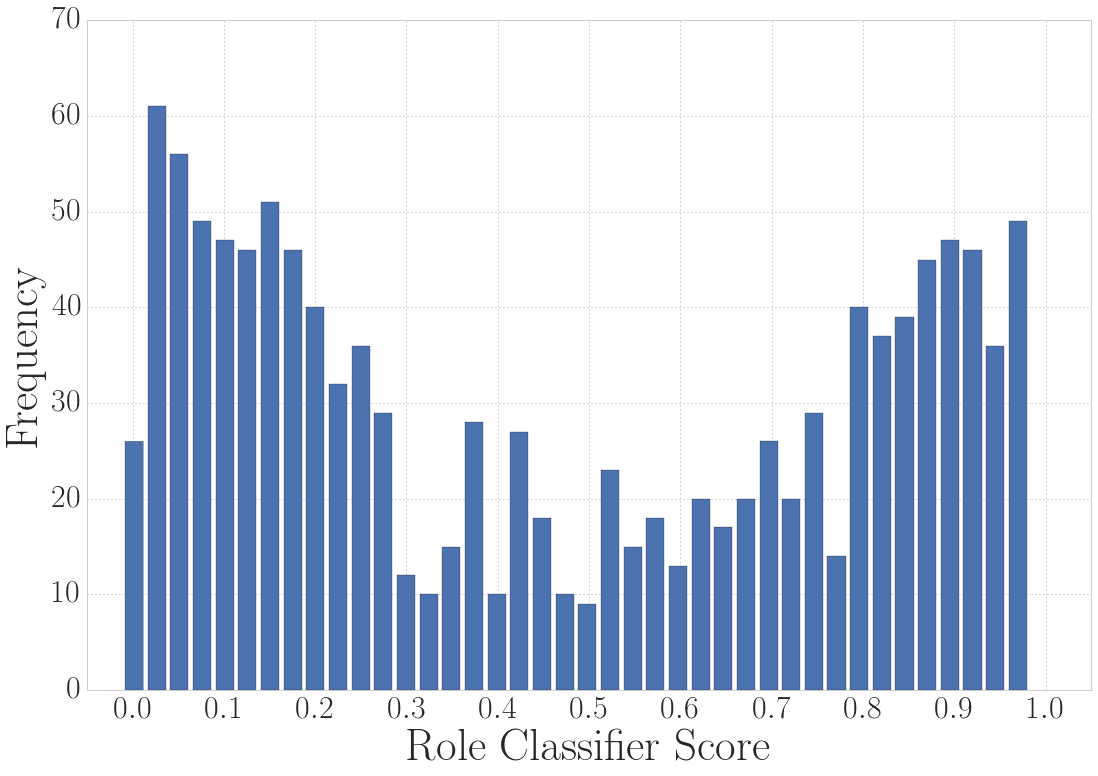

In [45]:
pgf_with_latex = {
        "axes.labelsize": 25,               # LaTeX default is 10pt font.
        "text.fontsize": 22,
        "legend.fontsize": 22,               # Make the legend/label fonts a little smaller
        "xtick.labelsize": 32,
        "ytick.labelsize": 32,
        }
mpl.rcParams.update(pgf_with_latex)
plt.rc('figure', figsize=(18,12))

rc("grid", alpha=0.9)
rc("grid", linewidth=0.7)
rc("grid", linestyle=":")
rc("grid", color='gray')

xticks = np.arange(0, 1.05, 0.1)
plt.xticks(xticks)
plt.grid(True)
plt.xlim([-0.05, 1.05])
# plt.xlim([0.05, 1.05])
# plt.ylim([0, 0.2])

# plt.hist(x, 50)
# plt.hist(x, 50, normed=1, histtype='bar', rwidth=0.7)
plt.hist(no, 40, histtype='bar', rwidth=0.8, align='left')
plt.xlabel('Role Classifier Score', fontsize=45)
plt.ylabel('Frequency', fontsize=45)

# plt.tight_layout()
plt.savefig("none_distribution" + ".pdf", format='pdf')
plt.show()